In [2]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pandas as pd

In [3]:
wkdir = '/Users/Marianne/Dropbox (Personlig)/DTU/9. semester/02456_Deep_learning/project/results/'

# Visualize performances

In [4]:
# Load performances
performance = pd.read_csv(wkdir+'model_performances.csv', sep=';')
performance.head()

,model,direction,window_size,embedding_dimension,perplexity,accuracy
0,CBoW (Uniform),-,-,-,NaN,NaN
1,CBoW,before,1,2,18.041133,9.4163
2,CBoW,before,5,2,17.910000,9.8100
3,CBoW,before,10,2,17.870000,9.8900
4,CBoW,before,15,2,17.857675,9.9689


In [5]:
c_pre = performance.loc[performance.direction == 'before']
c_post = performance.loc[performance.direction == 'after']
c_both = performance.loc[performance.direction == 'both']
c_pre.head()

,model,direction,window_size,embedding_dimension,perplexity,accuracy
1,CBoW,before,1,2,18.041133,9.4163
2,CBoW,before,5,2,17.910000,9.8100
3,CBoW,before,10,2,17.870000,9.8900
4,CBoW,before,15,2,17.857675,9.9689
5,CBoW,before,20,2,17.872976,9.9141


In [6]:
c_post.head()

,model,direction,window_size,embedding_dimension,perplexity,accuracy
7,CBoW,after,1,2,18.000508,9.7500
8,CBoW,after,5,2,17.940000,9.8100
9,CBoW,after,10,2,17.890000,9.9300
10,CBoW,after,15,2,17.874645,9.9534
11,CBoW,after,20,2,17.866107,9.9830


In [7]:
c_both.head()

,model,direction,window_size,embedding_dimension,perplexity,accuracy
13,CBoW,both,1,2,17.989137,9.7214
14,CBoW,both,5,2,17.800000,10.0600
15,CBoW,both,10,2,17.740000,10.1600
16,CBoW,both,15,2,17.728582,10.2101
17,CBoW,both,20,2,17.729718,10.2755


In [8]:
acc = pd.DataFrame(data={'model': c_pre.model.values, 'ws': c_pre.window_size.values, 'pre':c_pre.accuracy.values, 'post':c_post.accuracy.values, 'both':c_both.accuracy.values})
acc.head()

,model,ws,pre,post,both
0,CBoW,1,9.4163,9.7500,9.7214
1,CBoW,5,9.8100,9.8100,10.0600
2,CBoW,10,9.8900,9.9300,10.1600
3,CBoW,15,9.9689,9.9534,10.2101
4,CBoW,20,9.9141,9.9830,10.2755


In [9]:
perp = pd.DataFrame(data={'model': c_pre.model.values, 'ws': c_pre.window_size.values, 'pre':c_pre.perplexity.values, 'post':c_post.perplexity.values, 'both':c_both.perplexity.values})
perp.head()

,model,ws,pre,post,both
0,CBoW,1,18.041133,18.000508,17.989137
1,CBoW,5,17.910000,17.940000,17.800000
2,CBoW,10,17.870000,17.890000,17.740000
3,CBoW,15,17.857675,17.874645,17.728582
4,CBoW,20,17.872976,17.866107,17.729718


## Make combined plot for acc and perp

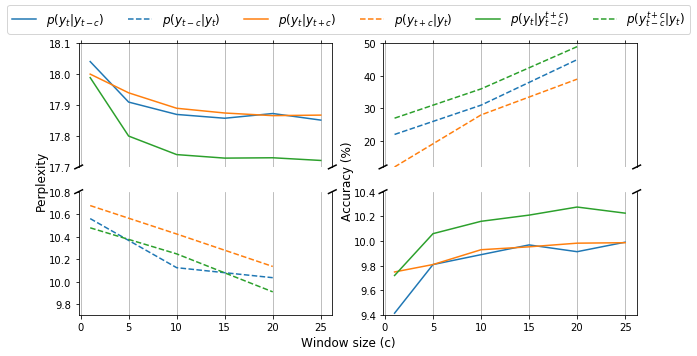

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, figsize=(10, 5), sharex=True)

# Plot on axis (0 = Perplexity, 1 = Accuracy)
for ax in [ax1, ax2]: 
    # ax1 is CBoW
    c_pre, c_post, c_both = ax[0].plot(perp.loc[perp.model == 'CBoW'].ws, perp.loc[perp.model == 'CBoW'].pre, '-C0', 
                               perp.loc[perp.model == 'CBoW'].ws, perp.loc[perp.model == 'CBoW'].post, '-C1', 
                               perp.loc[perp.model == 'CBoW'].ws, perp.loc[perp.model == 'CBoW'].both, '-C2')
    c_pre, c_post, c_both = ax[1].plot(acc.loc[perp.model == 'CBoW'].ws, acc.loc[perp.model == 'CBoW'].pre, '-C0', 
                               acc.loc[perp.model == 'CBoW'].ws, acc.loc[perp.model == 'CBoW'].post, '-C1', 
                               acc.loc[perp.model == 'CBoW'].ws, acc.loc[perp.model == 'CBoW'].both, '-C2')

    # ax2 is Skip-gram
    s_pre, s_post, s_both = ax[0].plot(perp.loc[perp.model == 'SG'].ws, perp.loc[perp.model == 'SG'].pre, '--C0', 
                               perp.loc[perp.model == 'SG'].ws, perp.loc[perp.model == 'SG'].post, '--C1', 
                               perp.loc[perp.model == 'SG'].ws, perp.loc[perp.model == 'SG'].both, '--C2')
    s_pre, s_post, s_both = ax[1].plot(acc.loc[perp.model == 'SG'].ws, acc.loc[perp.model == 'SG'].pre, '--C0', 
                               acc.loc[perp.model == 'SG'].ws, acc.loc[perp.model == 'SG'].post, '--C1', 
                               acc.loc[perp.model == 'SG'].ws, acc.loc[perp.model == 'SG'].both, '--C2')

# Hide the spines between CBoW and Skip-gram
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
for i in range(2): 
    ax1[i].spines['bottom'].set_visible(False)
    ax2[i].spines['top'].set_visible(False)
    ax1[i].xaxis.tick_top()
    ax1[i].tick_params(labeltop='off')  # don't put tick labels at the top
    ax2[i].xaxis.tick_bottom()
    
    # Set diagonal lines on split axes
    kwargs = dict(transform=ax1[i].transAxes, color='k', clip_on=False)
    ax1[i].plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax1[i].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2[i].transAxes)  # switch to the bottom axes
    ax2[i].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax2[i].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# Set grids
for ax in [ax1, ax2]: 
    ax[0].grid(which='major', axis='x')
    ax[1].grid(which='major', axis='x')

# Set axis limits
ax1[0].set_ylim(17.7, 18.1) # Perplexity upper
ax2[0].set_ylim(9.7, 10.8) # Perplexity lower
ax1[1].set_ylim(12, 50) # Accuracy upper
ax2[1].set_ylim(9.4, 10.4) # Accuracy lower
    
# Set axis labels
fig.text(0.064, 0.5, 'Perplexity', va='center', rotation='vertical', fontsize=12)
fig.text(0.49, 0.5, 'Accuracy (%)', va='center', rotation='vertical', fontsize=12)
#ax2.set_ylabel('Accuracy (%)', fontsize=12)

# Overall figure settings
fig.text(0.5, 0.04, 'Window size (c)', ha='center', fontsize=12)
fig.legend(handles=[c_pre, s_pre, c_post, s_post, c_both, s_both], 
           loc='upper center', 
           labels=['$p(y_t|y_{t-c})$', '$p(y_{t-c}|y_t)$', 
                   '$p(y_t|y_{t+c})$', '$p(y_{t+c}|y_t)$', 
                   '$p(y_t|y_{t-c}^{t+c})$', '$p(y_{t-c}^{t+c}|y_t)$'], 
           ncol=6, fontsize=12)
plt.savefig(wkdir+'performances.pdf', dpi=1000)